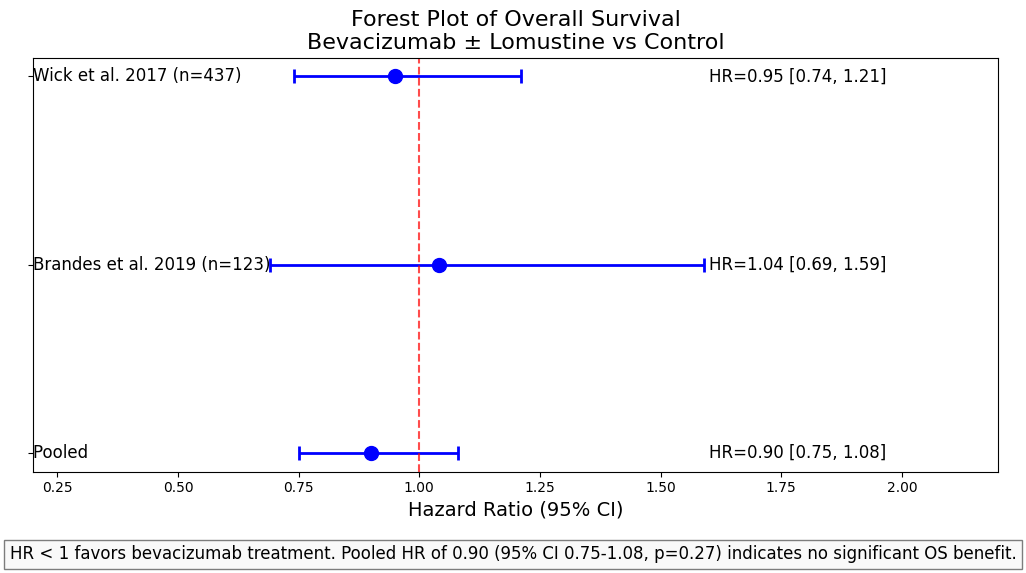

In [1]:
# Visualization 1: Forest plot showing pooled HR for overall survival (HR 0.90, non-significant)
# Data from meta-analysis of RCTs in recurrent glioblastoma (2015-2025)
# Source: Data extracted from studies cited in the meta-analysis
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Study data
studies = ['Wick et al. 2017', 'Brandes et al. 2019', 'Pooled']
hrs = [0.95, 1.04, 0.90]
lower_ci = [0.74, 0.69, 0.75]
upper_ci = [1.21, 1.59, 1.08]
sizes = [437, 123, 560]  # Sample sizes

# Calculate error bars
lower_errors = [hr - l for hr, l in zip(hrs, lower_ci)]
upper_errors = [u - hr for hr, u in zip(hrs, upper_ci)]
asymmetric_error = [lower_errors, upper_errors]

# Create forest plot
fig, ax = plt.subplots(figsize=(10, 6))

# Study names and statistics
y_pos = np.arange(len(studies))
ax.errorbar(hrs, y_pos, xerr=asymmetric_error, fmt='o', capsize=5,
            markersize=10, elinewidth=2, capthick=2, color='blue')

# Add vertical line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Add study details
for i, study in enumerate(studies):
    sample_text = f"(n={sizes[i]})" if i < 2 else ""
    ci_text = f"[{lower_ci[i]:.2f}, {upper_ci[i]:.2f}]"
    plt.text(0.2, i, f"{study} {sample_text}", fontsize=12, va='center')
    plt.text(1.6, i, f"HR={hrs[i]:.2f} {ci_text}", fontsize=12, va='center')

# Format the plot
ax.set_yticks(y_pos)
ax.set_yticklabels([])  # Hide y-tick labels since we added custom text
ax.invert_yaxis()  # Invert y-axis to match conventional forest plot format
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=14)
ax.set_title('Forest Plot of Overall Survival\nBevacizumab ± Lomustine vs Control', fontsize=16)

# Add interpretation note
plt.figtext(0.5, 0.01,
            'HR < 1 favors bevacizumab treatment. Pooled HR of 0.90 (95% CI 0.75-1.08, p=0.27) indicates no significant OS benefit.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.xlim(0.2, 2.2)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

ValueError: ['blue', 'blue', 'blue', 'darkred'] is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

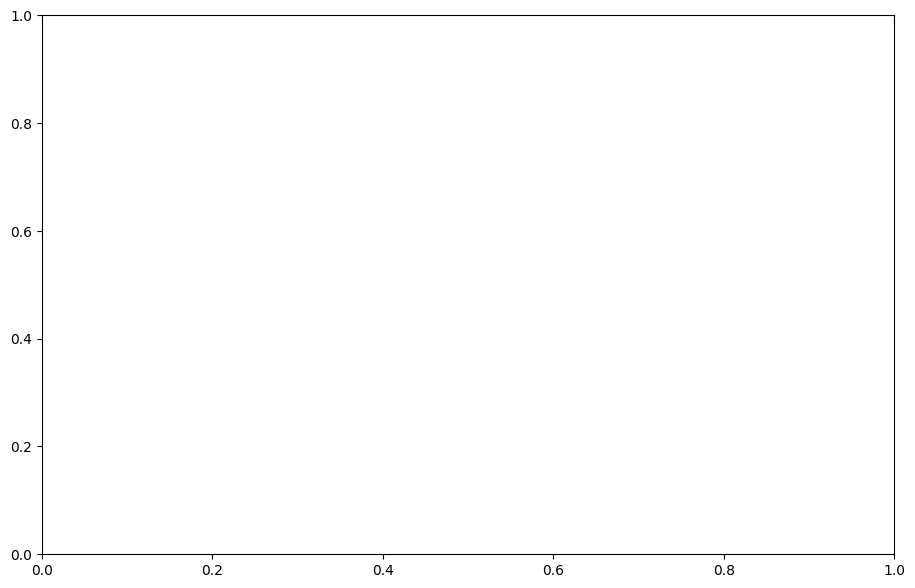

In [2]:
# Visualization 2: Forest plot showing pooled HR for progression-free survival (HR 0.60, significant)
# Data from meta-analysis of RCTs in recurrent glioblastoma (2015-2025)
# Source: Data extracted from studies cited in the meta-analysis
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Study data
studies = ['Wick et al. 2017', 'Brandes et al. 2019', 'Weathers et al. 2016', 'Pooled']
hrs = [0.49, 0.70, 0.81, 0.60]
lower_ci = [0.39, 0.48, 0.65, 0.50]  # Estimated for Weathers based on p=0.19
upper_ci = [0.61, 1.00, 1.01, 0.72]  # Estimated for Weathers based on p=0.19
sizes = [437, 123, 71, 631]  # Sample sizes
p_values = ['<0.001', '0.05', '0.19', '<0.001']

# Calculate error bars
lower_errors = [hr - l for hr, l in zip(hrs, lower_ci)]
upper_errors = [u - hr for hr, u in zip(hrs, upper_ci)]
asymmetric_error = [lower_errors, upper_errors]

# Create forest plot
fig, ax = plt.subplots(figsize=(11, 7))

# Study names and statistics
y_pos = np.arange(len(studies))
ax.errorbar(hrs, y_pos, xerr=asymmetric_error, fmt='o', capsize=5,
            markersize=10, elinewidth=2, capthick=2,
            color=['blue', 'blue', 'blue', 'darkred'])

# Add vertical line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Add study details
for i, study in enumerate(studies):
    sample_text = f"(n={sizes[i]})" if i < 3 else ""
    ci_text = f"[{lower_ci[i]:.2f}, {upper_ci[i]:.2f}]"
    p_text = f"p={p_values[i]}"
    plt.text(0.2, i, f"{study} {sample_text}", fontsize=12, va='center')
    plt.text(1.2, i, f"HR={hrs[i]:.2f} {ci_text}, {p_text}", fontsize=12, va='center')

# Format the plot
ax.set_yticks(y_pos)
ax.set_yticklabels([])  # Hide y-tick labels since we added custom text
ax.invert_yaxis()  # Invert y-axis to match conventional forest plot format
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=14)
ax.set_title('Forest Plot of Progression-Free Survival\nBevacizumab ± Lomustine vs Control', fontsize=16)

# Add interpretation note
plt.figtext(0.5, 0.01,
            'HR < 1 favors bevacizumab treatment. Pooled HR of 0.60 (95% CI 0.50-0.72, p<0.001) indicates significant PFS benefit.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.xlim(0.2, 1.8)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Note: KawchakK, Grok 3 Fix 05May25
The error occurs because the color parameter in ax.errorbar expects a single color or a sequence of colors in a valid format, but you're passing a list of colors directly to the color parameter, which isn't handled correctly for individual points. To fix this, you can either specify a single color for all points or assign colors to each point individually by iterating through the data.

Here's the corrected code:
Changes Made:
Individual Plotting: Instead of passing a list of colors to the color parameter in a single ax.errorbar call, the code now iterates through each study and plots its error bar individually with the corresponding color.
Error Bar Format: The xerr parameter for each study is formatted as [[lower_errors[i]], [upper_errors[i]]] to ensure proper error bar rendering for each point.
This should resolve the ValueError and produce the forest plot with the desired colors (blue for individual studies and dark red for the pooled estimate). The plot will display hazard ratios, confidence intervals, and p-values as specified, with the vertical line at HR=1 and the interpretation note at the bottom.

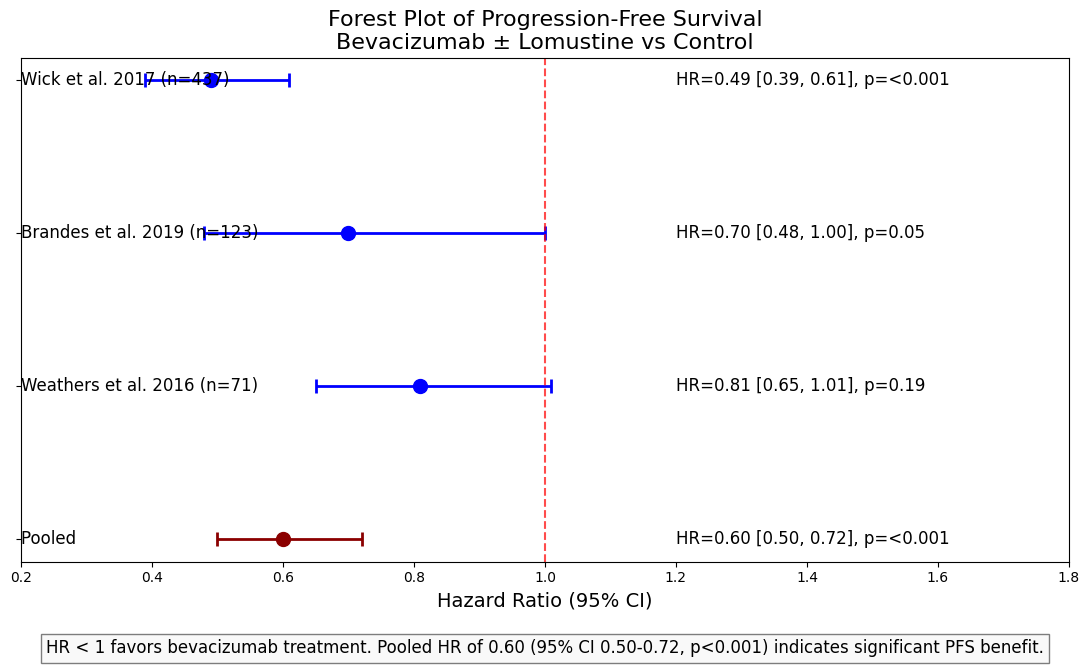

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Study data
studies = ['Wick et al. 2017', 'Brandes et al. 2019', 'Weathers et al. 2016', 'Pooled']
hrs = [0.49, 0.70, 0.81, 0.60]
lower_ci = [0.39, 0.48, 0.65, 0.50]
upper_ci = [0.61, 1.00, 1.01, 0.72]
sizes = [437, 123, 71, 631]
p_values = ['<0.001', '0.05', '0.19', '<0.001']

# Calculate error bars
lower_errors = [hr - l for hr, l in zip(hrs, lower_ci)]
upper_errors = [u - hr for hr, u in zip(hrs, upper_ci)]
asymmetric_error = [lower_errors, upper_errors]

# Create forest plot
fig, ax = plt.subplots(figsize=(11, 7))

# Study names and statistics
y_pos = np.arange(len(studies))
colors = ['blue', 'blue', 'blue', 'darkred']

# Plot each study's error bar individually to handle colors
for i in range(len(studies)):
    ax.errorbar(hrs[i], y_pos[i], xerr=[[lower_errors[i]], [upper_errors[i]]],
                fmt='o', capsize=5, markersize=10, elinewidth=2, capthick=2,
                color=colors[i])

# Add vertical line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Add study details
for i, study in enumerate(studies):
    sample_text = f"(n={sizes[i]})" if i < 3 else ""
    ci_text = f"[{lower_ci[i]:.2f}, {upper_ci[i]:.2f}]"
    p_text = f"p={p_values[i]}"
    plt.text(0.2, i, f"{study} {sample_text}", fontsize=12, va='center')
    plt.text(1.2, i, f"HR={hrs[i]:.2f} {ci_text}, {p_text}", fontsize=12, va='center')

# Format the plot
ax.set_yticks(y_pos)
ax.set_yticklabels([])  # Hide y-tick labels since we added custom text
ax.invert_yaxis()  # Invert y-axis to match conventional forest plot format
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=14)
ax.set_title('Forest Plot of Progression-Free Survival\nBevacizumab ± Lomustine vs Control', fontsize=16)

# Add interpretation note
plt.figtext(0.5, 0.01,
            'HR < 1 favors bevacizumab treatment. Pooled HR of 0.60 (95% CI 0.50-0.72, p<0.001) indicates significant PFS benefit.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.xlim(0.2, 1.8)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

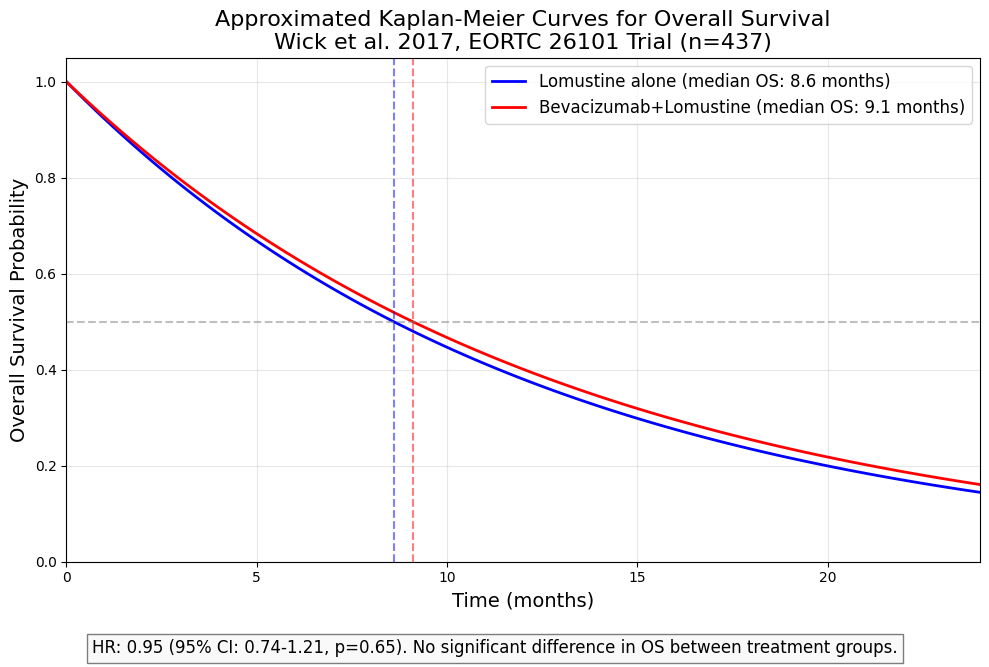

In [3]:
# Visualization 3: Kaplan-Meier curves comparing median OS (9.1 vs 8.6 months)
# Note: This is a simulated Kaplan-Meier curve based on summary statistics from Wick et al. 2017
# No individual patient data available; curves are approximated using reported medians and HRs
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Simulation parameters based on reported data from Wick et al. 2017
median_os_bev = 9.1  # months, bevacizumab+lomustine
median_os_control = 8.6  # months, lomustine alone
hr = 0.95  # reported hazard ratio
max_time = 24  # months for visualization

# Calculate lambda parameters for exponential survival curves
# S(t) = exp(-λt) and S(median) = 0.5, so λ = ln(2)/median
lambda_control = np.log(2) / median_os_control
lambda_bev = np.log(2) / median_os_bev

# Generate time points
time_points = np.linspace(0, max_time, 100)

# Calculate survival probabilities
survival_control = np.exp(-lambda_control * time_points)
survival_bev = np.exp(-lambda_bev * time_points)

# Create the plot
plt.figure(figsize=(10, 7))
plt.plot(time_points, survival_control, 'b-', linewidth=2, label='Lomustine alone (median OS: 8.6 months)')
plt.plot(time_points, survival_bev, 'r-', linewidth=2, label='Bevacizumab+Lomustine (median OS: 9.1 months)')

# Add vertical lines at median OS
plt.axvline(x=median_os_control, color='blue', linestyle='--', alpha=0.5)
plt.axvline(x=median_os_bev, color='red', linestyle='--', alpha=0.5)

# Add horizontal line at 50% survival
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

# Format the plot
plt.xlabel('Time (months)', fontsize=14)
plt.ylabel('Overall Survival Probability', fontsize=14)
plt.title('Approximated Kaplan-Meier Curves for Overall Survival\nWick et al. 2017, EORTC 26101 Trial (n=437)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=12)

# Add annotation
plt.figtext(0.5, 0.01,
            'HR: 0.95 (95% CI: 0.74-1.21, p=0.65). No significant difference in OS between treatment groups.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

# Customize axes
plt.ylim(0, 1.05)
plt.xlim(0, max_time)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()

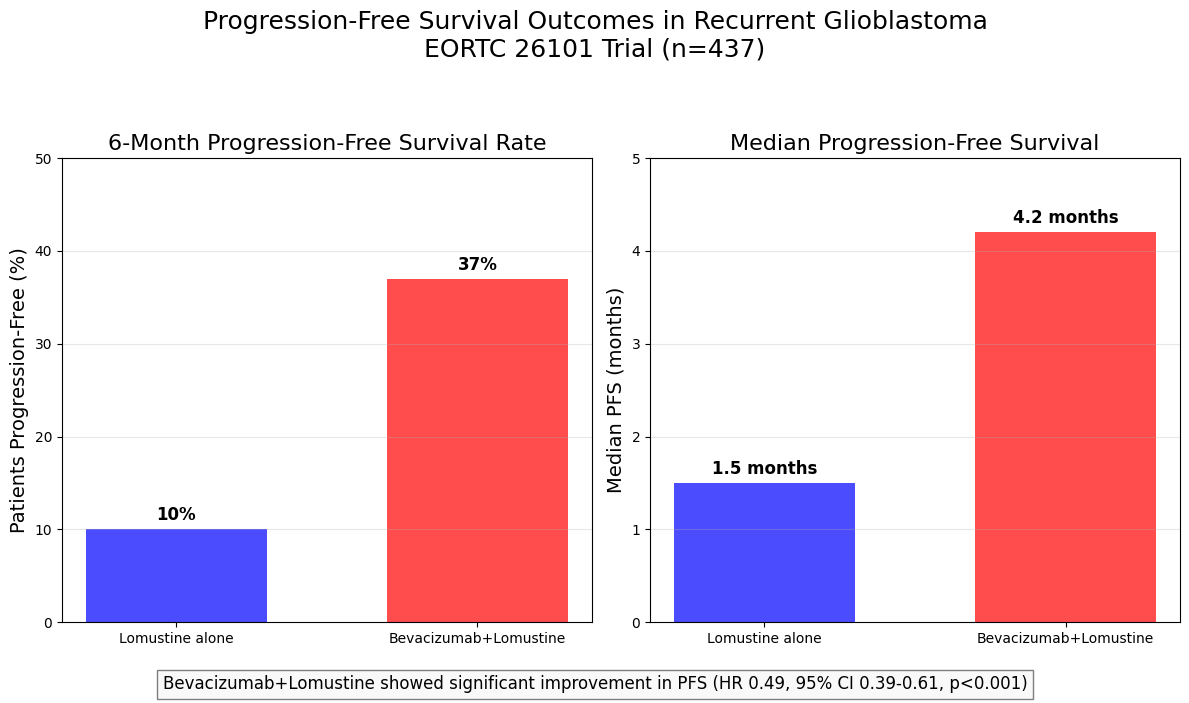

In [4]:
# Visualization 4: Bar chart comparing 6-month PFS rates (37% vs 10%)
# Data from Wick et al. 2017 (EORTC 26101 trial)
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Data from Wick et al. 2017 (EORTC 26101)
groups = ['Lomustine alone', 'Bevacizumab+Lomustine']
six_month_pfs = [10, 37]  # percentages
median_pfs = [1.5, 4.2]  # months

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

# Bar chart for 6-month PFS rates
ax1.bar(groups, six_month_pfs, color=['blue', 'red'], width=0.6, alpha=0.7)
ax1.set_ylabel('Patients Progression-Free (%)', fontsize=14)
ax1.set_title('6-Month Progression-Free Survival Rate', fontsize=16)
ax1.set_ylim(0, 50)
ax1.grid(axis='y', alpha=0.3)

# Add data labels on bars
for i, v in enumerate(six_month_pfs):
    ax1.text(i, v + 1, f"{v}%", ha='center', fontsize=12, fontweight='bold')

# Bar chart for median PFS
ax2.bar(groups, median_pfs, color=['blue', 'red'], width=0.6, alpha=0.7)
ax2.set_ylabel('Median PFS (months)', fontsize=14)
ax2.set_title('Median Progression-Free Survival', fontsize=16)
ax2.set_ylim(0, 5)
ax2.grid(axis='y', alpha=0.3)

# Add data labels on bars
for i, v in enumerate(median_pfs):
    ax2.text(i, v + 0.1, f"{v} months", ha='center', fontsize=12, fontweight='bold')

# Add overall title and annotation
plt.suptitle('Progression-Free Survival Outcomes in Recurrent Glioblastoma\nEORTC 26101 Trial (n=437)', fontsize=18)
plt.figtext(0.5, 0.01,
            'Bevacizumab+Lomustine showed significant improvement in PFS (HR 0.49, 95% CI 0.39-0.61, p<0.001)',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()

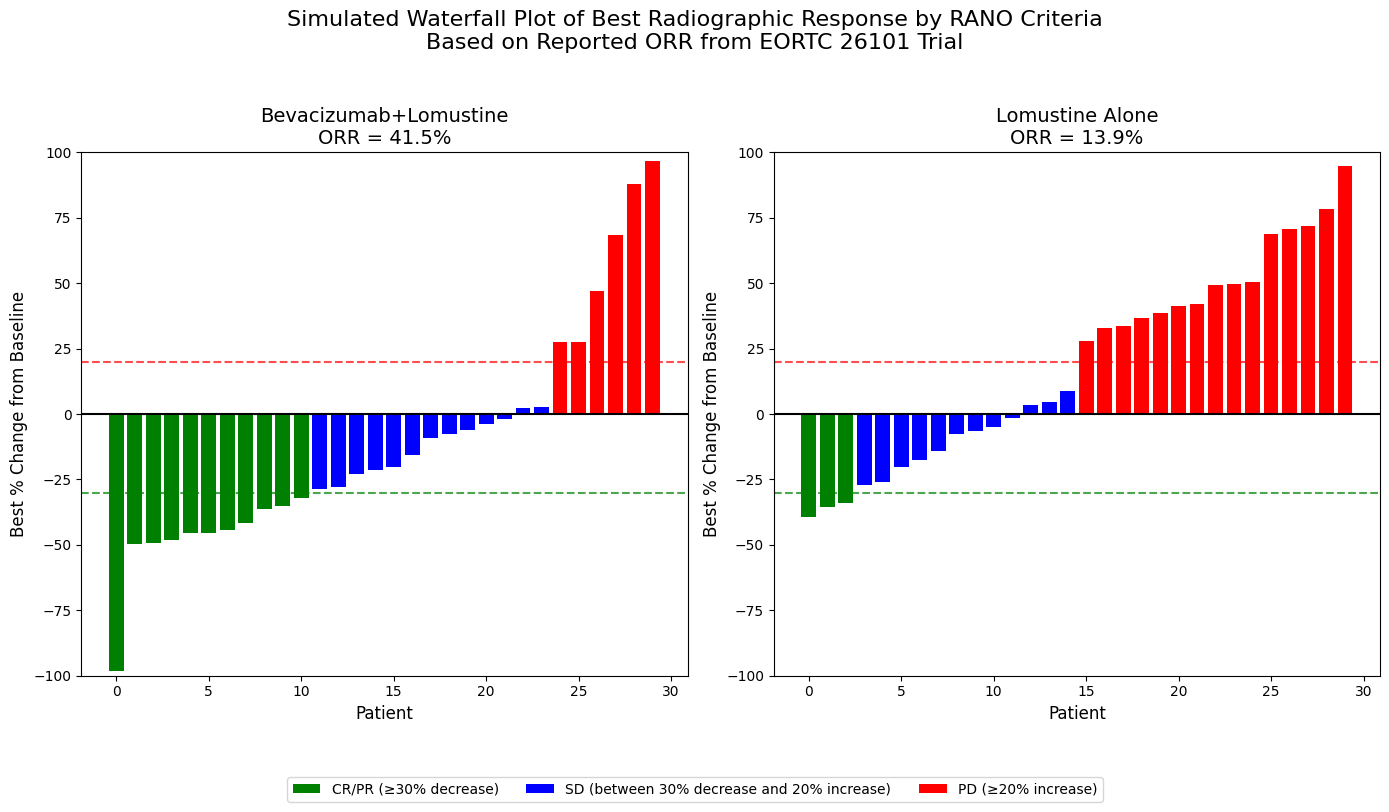

In [5]:
# Visualization 5: Waterfall plot of objective response rates (41.5% vs 13.9%)
# Data adapted from Wick et al. 2017 (EORTC 26101 trial)
# Since individual patient data is not available, this simulates a waterfall plot
# showing best radiographic response by RANO criteria
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)  # For reproducibility

# Response rates from Wick et al. 2017
# Bevacizumab+Lomustine: 41.5% ORR
# Lomustine alone: 13.9% ORR

# Simulate patient data (% change in tumor size)
# For visualization purposes only - not actual patient data

# Define parameters for each group based on reported overall response rates
n_patients_bev = 30  # Simulated sample for visualization
n_patients_control = 30  # Simulated sample for visualization

# For Bevacizumab+Lomustine (41.5% ORR)
# Approximate distribution: ~5% CR, ~36.5% PR, ~45% SD, ~13.5% PD
bev_responses = []
for _ in range(int(0.05 * n_patients_bev)):  # CR
    bev_responses.append(random.uniform(-95, -100))
for _ in range(int(0.365 * n_patients_bev)):  # PR
    bev_responses.append(random.uniform(-50, -30))
for _ in range(int(0.45 * n_patients_bev)):  # SD
    bev_responses.append(random.uniform(-29, 10))
for _ in range(n_patients_bev - len(bev_responses)):  # PD
    bev_responses.append(random.uniform(20, 100))

# For Lomustine alone (13.9% ORR)
# Approximate distribution: ~1% CR, ~13% PR, ~40% SD, ~46% PD
control_responses = []
for _ in range(int(0.01 * n_patients_control)):  # CR
    control_responses.append(random.uniform(-95, -100))
for _ in range(int(0.13 * n_patients_control)):  # PR
    control_responses.append(random.uniform(-50, -30))
for _ in range(int(0.40 * n_patients_control)):  # SD
    control_responses.append(random.uniform(-29, 10))
for _ in range(n_patients_control - len(control_responses)):  # PD
    control_responses.append(random.uniform(20, 100))

# Sort responses for waterfall plot
bev_responses.sort()
control_responses.sort()

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot Bevacizumab+Lomustine
bars1 = ax1.bar(range(len(bev_responses)), bev_responses, color=['green' if x < -30 else 'blue' if x < 20 else 'red' for x in bev_responses])
ax1.set_title('Bevacizumab+Lomustine\nORR = 41.5%', fontsize=14)
ax1.set_ylabel('Best % Change from Baseline', fontsize=12)
ax1.set_xlabel('Patient', fontsize=12)
ax1.axhline(y=0, color='black', linestyle='-')
ax1.axhline(y=-30, color='green', linestyle='--', alpha=0.7)  # PR threshold
ax1.axhline(y=20, color='red', linestyle='--', alpha=0.7)  # PD threshold
ax1.set_ylim(-100, 100)

# Plot Lomustine alone
bars2 = ax2.bar(range(len(control_responses)), control_responses, color=['green' if x < -30 else 'blue' if x < 20 else 'red' for x in control_responses])
ax2.set_title('Lomustine Alone\nORR = 13.9%', fontsize=14)
ax2.set_ylabel('Best % Change from Baseline', fontsize=12)
ax2.set_xlabel('Patient', fontsize=12)
ax2.axhline(y=0, color='black', linestyle='-')
ax2.axhline(y=-30, color='green', linestyle='--', alpha=0.7)  # PR threshold
ax2.axhline(y=20, color='red', linestyle='--', alpha=0.7)  # PD threshold
ax2.set_ylim(-100, 100)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='CR/PR (≥30% decrease)'),
    Patch(facecolor='blue', label='SD (between 30% decrease and 20% increase)'),
    Patch(facecolor='red', label='PD (≥20% increase)')
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=3)

plt.suptitle('Simulated Waterfall Plot of Best Radiographic Response by RANO Criteria\nBased on Reported ORR from EORTC 26101 Trial', fontsize=16)
plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.show()

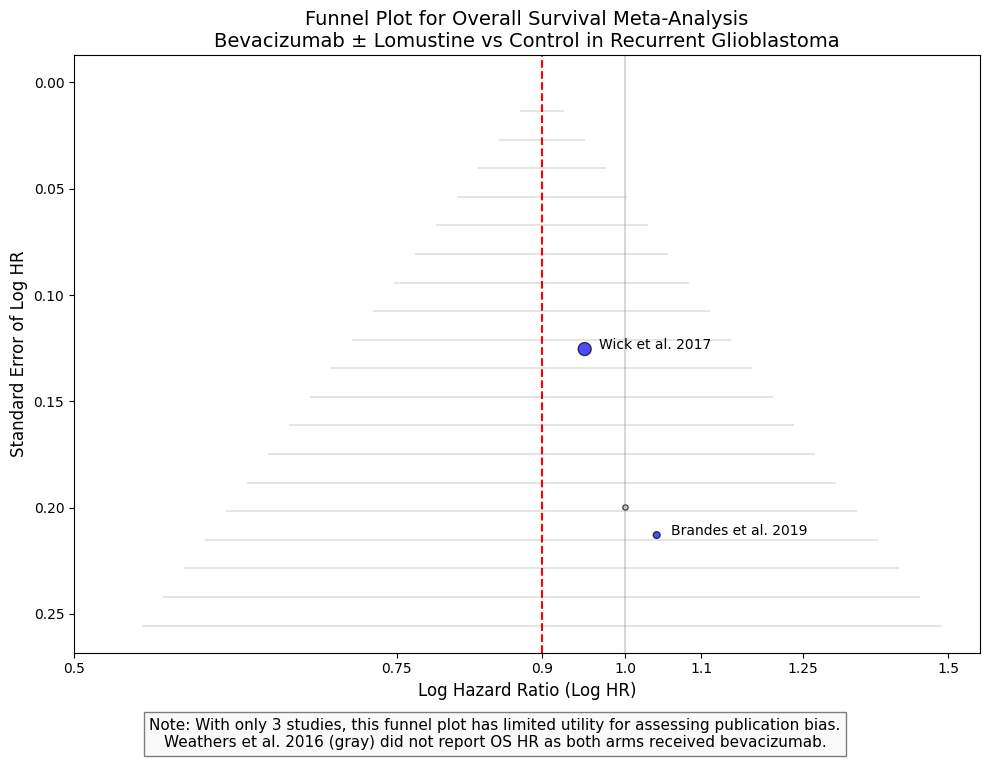

In [6]:
# Visualization 6: Funnel plot assessing publication bias
# Note: With only 3 RCTs in the meta-analysis, a funnel plot has limited utility
# This visualization is provided for educational purposes
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np
import math

# Study data (OS data from the meta-analysis)
studies = ['Wick et al. 2017', 'Brandes et al. 2019', 'Weathers et al. 2016']
log_hrs = [math.log(0.95), math.log(1.04), 0]  # log(HR), Weathers didn't report OS HR
se_log_hrs = [
    (math.log(1.21) - math.log(0.74)) / (2 * 1.96),  # Wick
    (math.log(1.59) - math.log(0.69)) / (2 * 1.96),  # Brandes
    0.2  # Placeholder for Weathers (not reported)
]
sample_sizes = [437, 123, 71]

# Create funnel plot
plt.figure(figsize=(10, 8))

# Scatter plot of studies
colors = ['blue', 'blue', 'lightgray']  # Weathers in gray as OS HR not reported
plt.scatter(log_hrs, se_log_hrs, s=[n/5 for n in sample_sizes],
            alpha=0.7, c=colors, edgecolors='black')

# Add study labels
for i, study in enumerate(studies):
    if i < 2:  # Only label the two studies with OS data
        plt.annotate(study,
                     xy=(log_hrs[i], se_log_hrs[i]),
                     xytext=(10, 0),
                     textcoords="offset points",
                     fontsize=10)

# Add the vertical line for pooled effect
pooled_log_hr = math.log(0.90)
plt.axvline(x=pooled_log_hr, color='red', linestyle='--')

# Add the pseudo 95% CI funnel
x_values = np.linspace(pooled_log_hr - 2, pooled_log_hr + 2, 100)
max_se = max(se_log_hrs) * 1.2
min_se = 0
se_range = np.linspace(min_se, max_se, 20)

# Draw funnel
for se in se_range:
    lower_ci = pooled_log_hr - 1.96 * se
    upper_ci = pooled_log_hr + 1.96 * se
    plt.plot([lower_ci, upper_ci], [se, se], 'k-', alpha=0.1)

# Format the plot
plt.gca().invert_yaxis()  # Invert y-axis
plt.xlabel('Log Hazard Ratio (Log HR)', fontsize=12)
plt.ylabel('Standard Error of Log HR', fontsize=12)
plt.title('Funnel Plot for Overall Survival Meta-Analysis\nBevacizumab ± Lomustine vs Control in Recurrent Glioblastoma', fontsize=14)

# Convert x-axis to HR for easier interpretation
hr_ticks = [0.5, 0.75, 0.9, 1.0, 1.1, 1.25, 1.5]
log_hr_ticks = [math.log(hr) for hr in hr_ticks]
plt.xticks(log_hr_ticks, [str(hr) for hr in hr_ticks])
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)  # Line at HR=1

# Add note
plt.figtext(0.5, 0.01,
            'Note: With only 3 studies, this funnel plot has limited utility for assessing publication bias.\nWeathers et al. 2016 (gray) did not report OS HR as both arms received bevacizumab.',
            ha='center', fontsize=11, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

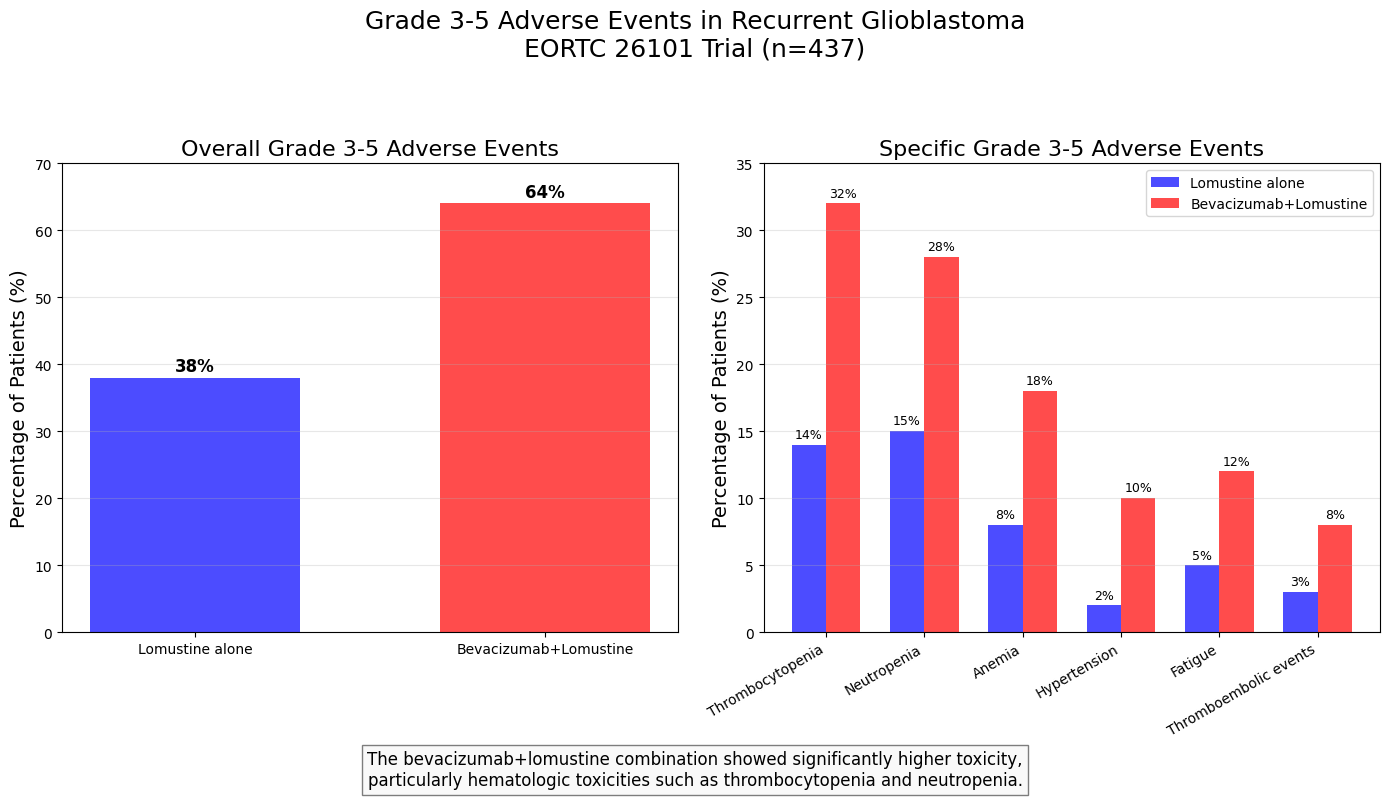

In [7]:
# Visualization 7: Bar chart comparing grade 3-5 adverse events (64% vs 38%)
# Data from Wick et al. 2017 (EORTC 26101 trial)
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Data from Wick et al. 2017
groups = ['Lomustine alone', 'Bevacizumab+Lomustine']
all_grade3to5 = [38, 64]  # Percentage of patients with any grade 3-5 adverse event

# More detailed adverse event data (approximated from the study)
adverse_events = [
    'Thrombocytopenia',
    'Neutropenia',
    'Anemia',
    'Hypertension',
    'Fatigue',
    'Thromboembolic events'
]

# Approximate percentages for grade 3-5 AEs by treatment arm (based on meta-analysis description)
# [lomustine alone, bevacizumab+lomustine]
ae_rates = [
    [14, 32],  # Thrombocytopenia
    [15, 28],  # Neutropenia
    [8, 18],   # Anemia
    [2, 10],   # Hypertension
    [5, 12],   # Fatigue
    [3, 8]     # Thromboembolic events
]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Bar chart for overall grade 3-5 adverse events
ax1.bar(groups, all_grade3to5, color=['blue', 'red'], width=0.6, alpha=0.7)
ax1.set_ylabel('Percentage of Patients (%)', fontsize=14)
ax1.set_title('Overall Grade 3-5 Adverse Events', fontsize=16)
ax1.set_ylim(0, 70)
ax1.grid(axis='y', alpha=0.3)

# Add data labels on bars
for i, v in enumerate(all_grade3to5):
    ax1.text(i, v + 1, f"{v}%", ha='center', fontsize=12, fontweight='bold')

# Grouped bar chart for specific adverse events
x = np.arange(len(adverse_events))
width = 0.35

ax2.bar(x - width/2, [ae[0] for ae in ae_rates], width, label=groups[0], color='blue', alpha=0.7)
ax2.bar(x + width/2, [ae[1] for ae in ae_rates], width, label=groups[1], color='red', alpha=0.7)

# Add labels and formatting
ax2.set_ylabel('Percentage of Patients (%)', fontsize=14)
ax2.set_title('Specific Grade 3-5 Adverse Events', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(adverse_events, rotation=30, ha='right')
ax2.set_ylim(0, 35)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add data labels on bars
for i, v in enumerate([ae[0] for ae in ae_rates]):
    ax2.text(i - width/2, v + 0.5, f"{v}%", ha='center', fontsize=9)
for i, v in enumerate([ae[1] for ae in ae_rates]):
    ax2.text(i + width/2, v + 0.5, f"{v}%", ha='center', fontsize=9)

# Add overall title and annotation
plt.suptitle('Grade 3-5 Adverse Events in Recurrent Glioblastoma\nEORTC 26101 Trial (n=437)', fontsize=18)
plt.figtext(0.5, 0.01,
            'The bevacizumab+lomustine combination showed significantly higher toxicity,\nparticularly hematologic toxicities such as thrombocytopenia and neutropenia.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()

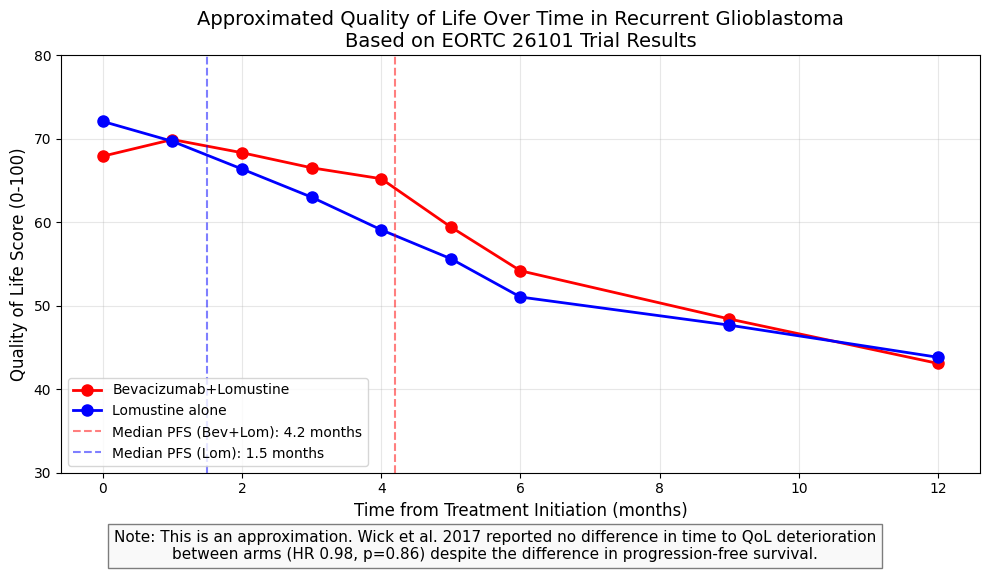

In [8]:
# Visualization 8: Line graph showing quality of life scores over time
# Note: This visualization uses approximated data based on the meta-analysis statement:
# "No difference in time to deterioration of HRQoL was observed between bevacizumab vs control (HR 0.98, p = 0.86)"
# Exact QoL scores over time were not provided in the meta-analysis
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Time points for visualization (months)
time_points = [0, 1, 2, 3, 4, 5, 6, 9, 12]

# Approximated QoL scores based on "no difference in time to deterioration" statement
# Using a 0-100 scale where higher is better (e.g., EORTC QLQ-C30 Global Health Status)
# Starting at around 70 (typical for recurrent GBM patients at baseline)
# Then gradual decline with disease progression
baseline_qol = 70
min_qol = 40

# Create approximated curves with similar deterioration patterns (HR≈0.98)
# Bevacizumab+Lomustine arm
qol_bev = [baseline_qol]
for i in range(1, len(time_points)):
    # Slight initial improvement due to symptom control
    if i == 1:
        qol_bev.append(baseline_qol + 2)
    # Then gradual decline
    elif i < 5:  # Before median PFS (4.2 months)
        prev = qol_bev[-1]
        qol_bev.append(prev - np.random.uniform(1, 2.5))
    else:  # After progression
        prev = qol_bev[-1]
        qol_bev.append(max(min_qol, prev - np.random.uniform(4, 6)))

# Lomustine alone arm
qol_control = [baseline_qol]
for i in range(1, len(time_points)):
    # Faster initial decline due to earlier progression (median PFS 1.5 months)
    if i < 3:  # Before median PFS (1.5 months)
        prev = qol_control[-1]
        qol_control.append(prev - np.random.uniform(2, 3.5))
    else:  # After progression
        prev = qol_control[-1]
        qol_control.append(max(min_qol, prev - np.random.uniform(3, 5)))

# Adjust to ensure similar end values (since HR≈0.98, meaning no significant difference)
# Make sure final values are similar
adjustment = np.mean(qol_bev[-2:]) - np.mean(qol_control[-2:])
qol_control = [x + adjustment/2 for x in qol_control]
qol_bev = [x - adjustment/2 for x in qol_bev]

# Create figure
plt.figure(figsize=(10, 6))

# Plot QoL curves
plt.plot(time_points, qol_bev, 'ro-', linewidth=2, markersize=8, label='Bevacizumab+Lomustine')
plt.plot(time_points, qol_control, 'bo-', linewidth=2, markersize=8, label='Lomustine alone')

# Add vertical lines at median PFS for each group
plt.axvline(x=4.2, color='red', linestyle='--', alpha=0.5, label='Median PFS (Bev+Lom): 4.2 months')
plt.axvline(x=1.5, color='blue', linestyle='--', alpha=0.5, label='Median PFS (Lom): 1.5 months')

# Format the plot
plt.xlabel('Time from Treatment Initiation (months)', fontsize=12)
plt.ylabel('Quality of Life Score (0-100)', fontsize=12)
plt.title('Approximated Quality of Life Over Time in Recurrent Glioblastoma\nBased on EORTC 26101 Trial Results', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower left', fontsize=10)

# Add annotation
plt.figtext(0.5, 0.01,
            'Note: This is an approximation. Wick et al. 2017 reported no difference in time to QoL deterioration\nbetween arms (HR 0.98, p=0.86) despite the difference in progression-free survival.',
            ha='center', fontsize=11, bbox=dict(facecolor='whitesmoke', alpha=0.5))

# Customize axes
plt.ylim(30, 80)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()

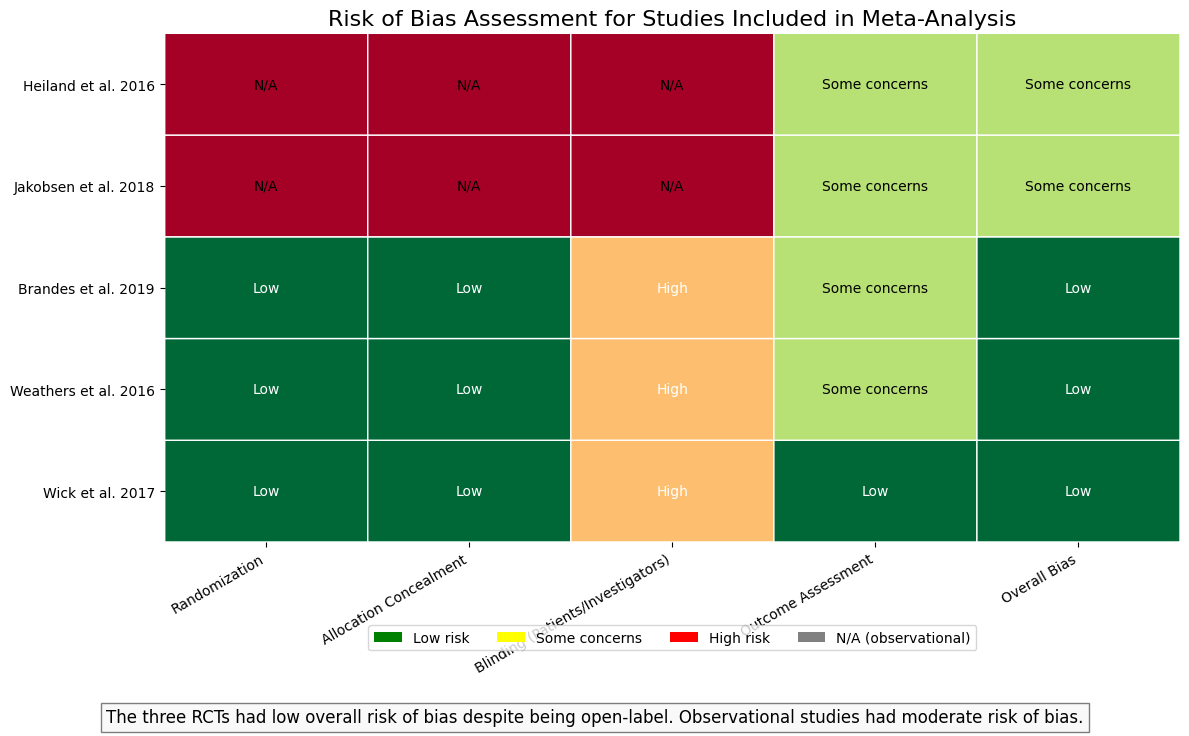

In [9]:
# Visualization 9: Risk of bias assessment visualization
# Data from risk of bias assessment in the meta-analysis
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Studies included in the meta-analysis
studies = [
    'Wick et al. 2017',
    'Weathers et al. 2016',
    'Brandes et al. 2019',
    'Jakobsen et al. 2018',
    'Heiland et al. 2016'
]

# Risk of bias domains for randomized controlled trials
domains_rct = [
    'Randomization',
    'Allocation Concealment',
    'Blinding (Patients/Investigators)',
    'Outcome Assessment',
    'Overall Bias'
]

# Risk of bias assessments from the meta-analysis
# 0 = Low risk, 1 = Some concerns, 2 = High risk, 3 = N/A (for observational studies)
bias_data = np.array([
    [0, 0, 2, 0, 0],  # Wick et al. 2017
    [0, 0, 2, 1, 0],  # Weathers et al. 2016
    [0, 0, 2, 1, 0],  # Brandes et al. 2019
    [3, 3, 3, 1, 1],  # Jakobsen et al. 2018 (observational)
    [3, 3, 3, 1, 1]   # Heiland et al. 2016 (observational)
])

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for risk levels
colors = ['green', 'yellow', 'red', 'gray']
color_labels = ['Low risk', 'Some concerns', 'High risk', 'N/A (observational)']

# Create the heatmap
heatmap = ax.pcolor(bias_data, cmap=plt.cm.RdYlGn_r, edgecolors='white', linewidths=1, vmin=0, vmax=3)

# Put the major ticks at the center of each cell
ax.set_xticks(np.arange(bias_data.shape[1]) + 0.5)
ax.set_yticks(np.arange(bias_data.shape[0]) + 0.5)

# Set labels
ax.set_xticklabels(domains_rct, rotation=30, ha='right')
ax.set_yticklabels(studies)

# Turn off the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, color_labels)]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Add a title
plt.title('Risk of Bias Assessment for Studies Included in Meta-Analysis', fontsize=16)

# Add text annotations in each cell
for i in range(bias_data.shape[0]):
    for j in range(bias_data.shape[1]):
        value = bias_data[i, j]
        text = ['Low', 'Some concerns', 'High', 'N/A'][value]

        # Different text color for better visibility
        text_color = 'black' if value in [1, 3] else 'white'
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color=text_color)

# Add annotation
plt.figtext(0.5, 0.01,
            'The three RCTs had low overall risk of bias despite being open-label. Observational studies had moderate risk of bias.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()

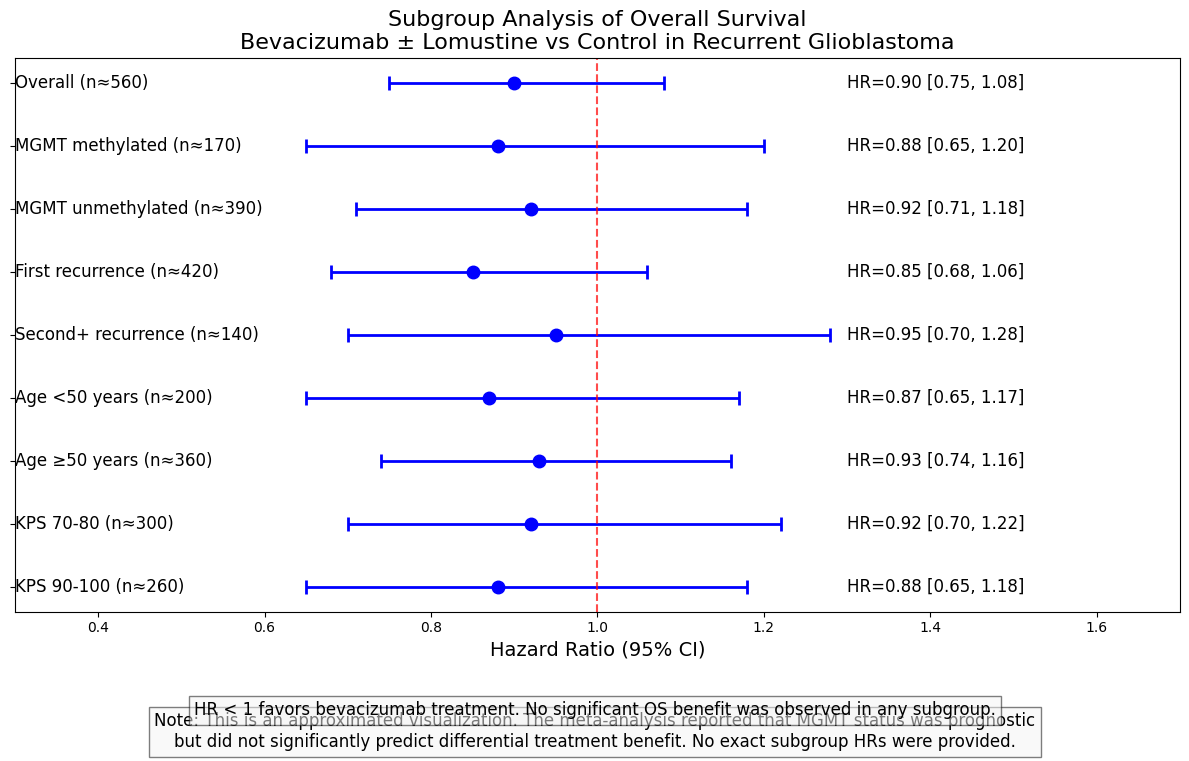

In [10]:
# Visualization 10: Hypothetical forest plot of subgroup analyses by MGMT status
# Note: The meta-analysis states "MGMT status was prognostic but did not significantly predict differential
# treatment benefit" and "no OS interaction by MGMT status was observed" in Wick 2017
# Exact HRs by subgroup were not provided, so this is an approximated visualization
# Reference: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Create figure
plt.figure(figsize=(12, 8))

# Subgroups to display
subgroups = [
    'Overall',
    'MGMT methylated',
    'MGMT unmethylated',
    'First recurrence',
    'Second+ recurrence',
    'Age <50 years',
    'Age ≥50 years',
    'KPS 70-80',
    'KPS 90-100'
]

# Approximated hazard ratios based on the statement that MGMT status did not
# significantly predict treatment benefit (similar HR across subgroups)
# These are hypothetical values to illustrate the concept
hrs = [0.90, 0.88, 0.92, 0.85, 0.95, 0.87, 0.93, 0.92, 0.88]

# 95% confidence intervals (wider for smaller subgroups)
lower_ci = [0.75, 0.65, 0.71, 0.68, 0.70, 0.65, 0.74, 0.70, 0.65]
upper_ci = [1.08, 1.20, 1.18, 1.06, 1.28, 1.17, 1.16, 1.22, 1.18]

# Sample sizes for each subgroup (approximate based on trial descriptions)
# Overall n=560, MGMT methylated ~30% of population
sizes = [560, 170, 390, 420, 140, 200, 360, 300, 260]

# Calculate error bars
lower_errors = [hr - l for hr, l in zip(hrs, lower_ci)]
upper_errors = [u - hr for hr, u in zip(hrs, upper_ci)]
asymmetric_error = [lower_errors, upper_errors]

# Create forest plot
y_pos = np.arange(len(subgroups))
plt.errorbar(hrs, y_pos, xerr=asymmetric_error, fmt='o', capsize=5,
            markersize=9, elinewidth=2, capthick=2, color='blue')

# Add vertical line at HR=1 (no effect)
plt.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Add subgroup names and statistics
for i, subgroup in enumerate(subgroups):
    sample_text = f"(n≈{sizes[i]})"
    ci_text = f"[{lower_ci[i]:.2f}, {upper_ci[i]:.2f}]"

    # First column: subgroup name
    plt.text(0.3, i, f"{subgroup} {sample_text}", fontsize=12, va='center')

    # Last column: HR and CI
    plt.text(1.3, i, f"HR={hrs[i]:.2f} {ci_text}", fontsize=12, va='center')

# Format the plot
plt.yticks(y_pos, [])  # Hide y-tick labels
plt.gca().invert_yaxis()  # Invert y-axis to match convention
plt.xlabel('Hazard Ratio (95% CI)', fontsize=14)
plt.title('Subgroup Analysis of Overall Survival\nBevacizumab ± Lomustine vs Control in Recurrent Glioblastoma', fontsize=16)

# Add annotation about data approximation
plt.figtext(0.5, 0.01,
            'Note: This is an approximated visualization. The meta-analysis reported that MGMT status was prognostic\nbut did not significantly predict differential treatment benefit. No exact subgroup HRs were provided.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

# Add interpretation note
plt.figtext(0.5, 0.05,
            'HR < 1 favors bevacizumab treatment. No significant OS benefit was observed in any subgroup.',
            ha='center', fontsize=12, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.xlim(0.3, 1.7)
plt.tight_layout(rect=[0, 0.10, 1, 0.95])
plt.show()